In [1]:
import sys
sys.path.append("../..")

import pandas

from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from pandas import DataFrame

# Import dictonaries and Types
from app.components.basic_dataframes import dictMealState, dfMealCode, dfMealState
from app.components.simple_types import Nutrition, State
from app.components.extract_data.extract_data import *

# Use simple function
from app.components.search.papa_search import papaSingleSeach, SearchResult

Loading basic data
Loading basic dictionary
Finish!


In [2]:

dfPerson = getDfPerson()
male25 = dfPerson[ (dfPerson["AGE"]==25) & (dfPerson["GENDER"]=="male") ]["PESSOA"].to_list()
male60 = dfPerson[ (dfPerson["AGE"]==60) & (dfPerson["GENDER"]=="male") ]["PESSOA"].to_list()
female25 = dfPerson[ (dfPerson["AGE"]==25) & (dfPerson["GENDER"]=="female") ]["PESSOA"].to_list()
female60 = dfPerson[ (dfPerson["AGE"]==60) & (dfPerson["GENDER"]=="female") ]["PESSOA"].to_list()

In [3]:
people = male25

personID = people[1]
personID = people[5]
# personID = 'UNKNOW'

print("people:", people)
print("personID:", personID)

people: ['110004584#15#1#1', '110010188#3#1#4', '110012387#6#1#3', '110021380#9#1#1', '110021533#5#1#1', '120001153#9#1#3', '120002090#16#1#4', '120005005#10#1#1', '120005365#7#1#3', '120005651#8#1#4', '120008232#6#1#1', '130003936#1#1#1', '130008889#3#1#2', '130008898#1#1#1', '130009050#8#1#8', '130015569#5#1#5', '130015855#13#1#4', '130015882#3#1#3', '130016987#6#1#3', '130021204#10#1#3', '130022974#5#1#1', '130023297#11#1#3', '130027323#11#1#3', '130030179#12#1#3', '130030911#11#1#2', '130036790#11#1#3', '130048174#4#1#3', '130049996#2#1#3', '130056503#11#1#1', '140001013#3#1#3', '140001375#2#1#1', '140003450#6#1#3', '140005740#4#1#4', '140007134#4#1#3', '140007330#5#1#2', '140007420#10#1#2', '140008008#12#1#2', '140008399#8#1#2', '150000410#1#1#1', '150000410#14#1#3', '150004961#6#1#1', '150011474#6#1#2', '150019650#2#1#1', '150030688#4#1#3', '150031875#3#1#1', '150034578#17#1#4', '150036787#7#1#2', '150044820#4#1#2', '150051248#13#1#4', '150072150#1#1#5', '150072586#1#1#6', '15007

In [4]:
# fitness = Nutrition.absDifference
fitness = Nutrition.absDifferenceNegativePenalty
# fitness = Nutrition.distanceDifference
# result = papaSingleSeach(personID, max_population_set=10, max_population_selected=5, max_steps=1000)
# result = papaSingleSeach(personID, verbose=True, max_population_set=10,max_population_selected=5, unit=50, max_unit=5, max_steps=25)
result = papaSingleSeach(personID, verbose=True, unit=25, max_unit=2, max_population_set=500, max_population_selected=300, expansion_set=50, expansion_select=20, max_steps=50, fitness=fitness)
# result = papaSingleSeach(personID, verbose=True, unit=100, max_unit=2, max_population_set=10, max_population_selected=10, expansion_set=10, expansion_select=3, max_steps=25, fitness=fitness)
# result = papaSingleSeach(personID, verbose=True, max_population_set=10,max_population_selected=8, expansion_set=5, unit=5, max_unit=10, max_steps=25, fitness=Nutrition.distanceDifference)

print(result)
targetNutrition = Nutrition.idealNutritionByPersonId(personID)
print("       PersonID: ", result.personIDs)
print("initialDistance: ", fitness(result.initialNutrition, targetNutrition))
print("  finalDistance: ", fitness(result.finalNutrition, targetNutrition))

Step 50: 
Best fitness:  1157.369519508821
initialState:  State: {8000101: 0.0, 7901602: 0.0, 8501303: 0.0, 6906602: 0.0, 6300101: 360.0, 7112802: 0.0, 6303102: 280.0, 6601805: 0.0, 8201004: 400.0, 8570328: 0.0, 7108902: 0.0, 8510601: 0.0, 8200101: 0.0, 8500903: 0.0, 7004301: 0.0, 7004802: 0.0, 8002201: 0.0, 8400101: 0.0, 8004801: 0.0, 8500401: 0.0, 6501516: 0.0, 6300113: 0.0, 7800302: 110.0, 8500605: 0.0, 6902910: 0.0, 6803001: 0.0, 6901701: 0.0, 8201005: 0.0, 8002254: 0.0, 6900702: 0.0, 8503801: 0.0, 8300101: 0.0, 8501302: 0.0, 7109101: 0.0, 8511401: 0.0, 8280001: 0.0, 7800401: 0.0, 6701704: 0.0, 6801101: 0.0, 6300201: 0.0, 7803301: 0.0, 6400802: 0.0, 6802601: 0.0, 8216301: 0.0, 7104102: 0.0, 8502204: 0.0, 8502202: 0.0, 8579146: 0.0, 6501415: 0.0, 8500416: 200.0, 8003801: 0.0, 6901002: 0.0, 8002225: 0.0, 7104301: 0.0, 8570329: 0.0, 6503401: 0.0, 8102205: 0.0, 8500202: 0.0, 8102101: 0.0, 8002246: 0.0, 8200301: 0.0, 6501401: 40.0, 8500402: 0.0, 6803401: 0.0, 8003601: 0.0, 8504501: 0.0,

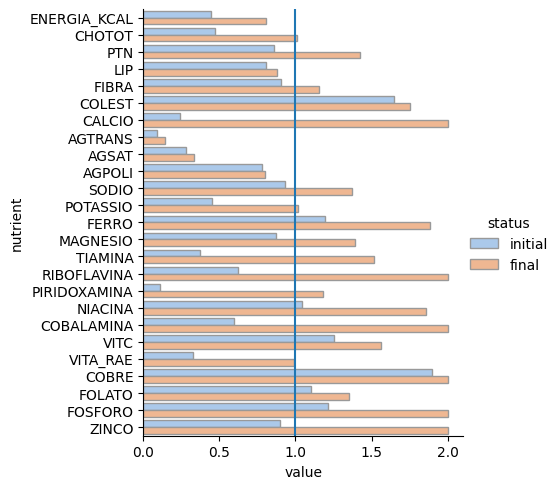

In [5]:
result.show_comparison_graph("", title="")


In [6]:
# from app.components.graphs.polar import plot_multiple_polar_charts

# # Exemplo de entrada para 1, 2 e 4 gráficos
# num_points = 36
# female_energy_data = np.random.uniform(500, 1200, num_points)
# male_energy_data = np.random.uniform(2400, 6000, num_points)
# female_protein_data = np.random.uniform(40, 100, num_points)
# male_protein_data = np.random.uniform(50, 125, num_points)
# female_vitamin_data = np.random.uniform(100, 200, num_points)
# male_vitamin_data = np.random.uniform(150, 250, num_points)
# female_mineral_data = np.random.uniform(10, 50, num_points)
# male_mineral_data = np.random.uniform(20, 60, num_points)

# # Exemplos de uso com 1, 2 e 4 gráficos
# data_1_chart = [
#     {"variable_name": "Energy", "x_data": female_energy_data, "y_data": male_energy_data, 
#      "x_label": "1600 kcal - 2200 kcal", "y_label": "2400 kcal - 3000 kcal"}
# ]

# data_2_charts = [
#     {"variable_name": "Energy", "x_data": female_energy_data, "y_data": male_energy_data, 
#      "x_label": "1600 kcal - 2200 kcal", "y_label": "2400 kcal - 3000 kcal"},
#     {"variable_name": "Protein", "x_data": female_protein_data, "y_data": male_protein_data, 
#      "x_label": "40 gr - 100 gr", "y_label": "50 gr - 125 gr"}
# ]

# data_4_charts = [
#     {"variable_name": "Energy", "x_data": female_energy_data, "y_data": male_energy_data, 
#      "x_label": "1600 kcal - 2200 kcal", "y_label": "2400 kcal - 3000 kcal"},
#     {"variable_name": "Protein", "x_data": female_protein_data, "y_data": male_protein_data, 
#      "x_label": "40 gr - 100 gr", "y_label": "50 gr - 125 gr"},
#     {"variable_name": "Vitamin", "x_data": female_vitamin_data, "y_data": male_vitamin_data, 
#      "x_label": "100 mg - 200 mg", "y_label": "150 mg - 250 mg"},
#     {"variable_name": "Mineral", "x_data": female_mineral_data, "y_data": male_mineral_data, 
#      "x_label": "10 mg - 50 mg", "y_label": "20 mg - 60 mg"}
# ]

# # Gerando os gráficos
# print("Exemplo com 1 gráfico:")
# plot_multiple_polar_charts(data_1_chart, labels=list(range(36)))

# print("Exemplo com 2 gráficos:")
# plot_multiple_polar_charts(data_2_charts)

# print("Exemplo com 4 gráficos:")
# plot_multiple_polar_charts(data_4_charts)


In [7]:
import random

print(random.random())

0.17772014660764324
